<a href="https://colab.research.google.com/github/rgdimas/Machine-learning/blob/main/Deep%20Learning%20Dimas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon May 23 17:26:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**0. ENSURE THAT DRIVE IS MOUNTED**

In [ ]:
# Ensure the drive is mounted
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. INSTALL AND SETUP TENSORFLOW**

In [ ]:
# Import tensorflow 1.x and install tf_slim.
%tensorflow_version 1.x
!pip install tf_slim
!pip show tensorflow

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 352 kB 8.3 MB/s 
Name: tensorflow
Version: 1.15.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /tensorflow-1.15.2/python3.7
Requires: keras-preprocessing, grpcio, opt-einsum, google-pasta, tensorboard, wheel, numpy, tensorflow-estimator, wrapt, protobuf, termcolor, astor, six, gast, keras-applications, absl-py
Required-by: stable-baselines, magenta, kapre


**2. DOWNLOAD AND SETUP TENSORFLOW OBJECT DETECTION API**

In [ ]:
# Install protobuf-compiler and the tensorflow's object detection API.
!apt-get install protobuf-compiler
!git clone https://github.com/tensorflow/models.git

import os
os.environ['PYTHONPATH'] += ':/content/models/research/'
os.environ['PYTHONPATH'] += ':/content/models/research/slim/'
os.environ['PYTHONPATH'] += ':/content/models/research/object_detection/utils/'
os.environ['PYTHONPATH'] += ':/content/models/research/object_detection'

%cd models/research
# Compile all the protobuf dependencies.
!protoc object_detection/protos/*.proto --python_out=.
# Set up and install the object detection API.
!cp object_detection/packages/tf1/setup.py .
!python -m pip install .
# Run a test to make sure setup is correct.
!python object_detection/builders/model_builder_test.py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Cloning into 'models'...
remote: Enumerating objects: 73045, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 73045 (delta 36), reused 73 (delta 26), pack-reused 72957
Receiving objects: 100% (73045/73045), 579.32 MiB | 33.71 MiB/s, done.
Resolving deltas: 100% (51711/51711), done.
/content/models/research
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directo

**3. DOWNLOAD THE PRETRAINED MODEL**

In [ ]:
# Now let's download our ssdlite mobiledet pretrained model from tensorflow's model zoo.
!mkdir /content/pretrained_model
%cd /content/pretrained_model
!wget http://download.tensorflow.org/models/object_detection/ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz
!tar xvf ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz

/content/pretrained_model
--2022-05-23 17:28:31--  http://download.tensorflow.org/models/object_detection/ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.197.128, 2607:f8b0:400e:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.197.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156413934 (149M) [application/x-tar]
Saving to: ‘ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz’

ssdlite_mobiledet_e 100%[===================>] 149.17M   112MB/s    in 1.3s    

2022-05-23 17:28:32 (112 MB/s) - ‘ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz’ saved [156413934/156413934]

ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/
ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/
ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/model.ckpt-400000.data-00000-of-00001
ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/model.ckpt-400000.

**4. COPY DATASET FROM DRIVE TO CURRENT ENV**

In [ ]:
!cp '/content/drive/MyDrive/Deep Learning/mobiledet-22/test.zip' /content
!cp '/content/drive/MyDrive/Deep Learning/mobiledet-22/train.zip' /content

!mkdir /content/dataset
!mkdir /content/dataset/test
!unzip /content/test.zip -d /content/dataset/test
!mkdir /content/dataset/train
!unzip /content/train.zip -d /content/dataset/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/test/test (102).xml  
  inflating: /content/dataset/test/test (103).jpg  
  inflating: /content/dataset/test/test (103).xml  
  inflating: /content/dataset/test/test (104).jpg  
  inflating: /content/dataset/test/test (104).xml  
  inflating: /content/dataset/test/test (105).jpg  
  inflating: /content/dataset/test/test (105).xml  
  inflating: /content/dataset/test/test (106).jpg  
  inflating: /content/dataset/test/test (106).xml  
  inflating: /content/dataset/test/test (107).jpg  
  inflating: /content/dataset/test/test (107).xml  
  inflating: /content/dataset/test/test (108).jpg  
  inflating: /content/dataset/test/test (108).xml  
  inflating: /content/dataset/test/test (109).jpg  
  inflating: /content/dataset/test/test (109).xml  
  inflating: /content/dataset/test/test (110).jpg  
  inflating: /content/dataset/test/test (110).xml  
  inflating: /content/dataset/test/test (111).jpg  
  inflating: 

**5. CONVERT XML TO TF RECORD**

In [ ]:
!mkdir /content/annotations

# Create train data:
!python "/content/drive/MyDrive/Deep Learning/mobiledet-22/util/generate_tfrecord.py" -x "/content/dataset/train" -l "/content/drive/MyDrive/Deep Learning/mobiledet-22/annotations/label_map.pbtxt" -o "/content/annotations/train.record"

# Create test data:
!python "/content/drive/MyDrive/Deep Learning/mobiledet-22/util/generate_tfrecord.py" -x "/content/dataset/test" -l "/content/drive/MyDrive/Deep Learning/mobiledet-22/annotations/label_map.pbtxt" -o "/content/annotations/test.record"

Successfully created the TFRecord file: /content/annotations/train.record
Successfully created the TFRecord file: /content/annotations/test.record


**6. SETUP THE PIPELINE**

In [ ]:
# Edit Pipeline config to load in our new tfrecord that we just created and add quantization aware training.
import tensorflow as tf
from google.protobuf import text_format
from object_detection.protos import pipeline_pb2

# Hack to find out if you have colab pro or not :)
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)
gpu_name = !nvidia-smi --query-gpu=gpu_name --format=csv
# You get Tesla T4 with free colab and Tesla P100-PCIe with colab pro.
colab_pro = False #if 'T4' in gpu_name else True

pipeline = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          
config_path = '/content/models/research/object_detection/samples/configs/ssdlite_mobiledet_edgetpu_320x320_coco_sync_4x4.config'
with tf.gfile.GFile(config_path, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline)

pipeline.train_input_reader.tf_record_input_reader.input_path[:] = ['/content/annotations/train.record']
pipeline.train_input_reader.label_map_path = '/content/drive/MyDrive/Deep Learning/mobiledet-22/annotations/label_map.pbtxt'
pipeline.eval_input_reader[0].tf_record_input_reader.input_path[:] = ['/content/annotations/test.record']
pipeline.eval_input_reader[0].label_map_path = '/content/drive/MyDrive/Deep Learning/mobiledet-22/annotations/label_map.pbtxt'
pipeline.train_config.fine_tune_checkpoint = '/content/pretrained_model/ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/model.ckpt'

# update the decay and steps for learning rate (to avoid NaN loss because of jumping too far)
pipeline.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.learning_rate_base = 0.1
pipeline.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.total_steps = 25000

pipeline.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.warmup_learning_rate = 0.01
pipeline.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.warmup_steps = 2000

pipeline.train_config.batch_size = 64 if colab_pro else 32 # Smaller batch size on free gpu to avoid OOM Killer
pipeline.train_config.num_steps = 25000 if colab_pro else 10000 # Less steps with free gpu but 10k should be good enough
pipeline.model.ssd.num_classes = 1
# Enable ssdlite, this should already be enabled in the config we downloaded, but this is just to make sure.
pipeline.model.ssd.box_predictor.convolutional_box_predictor.kernel_size = 3
pipeline.model.ssd.box_predictor.convolutional_box_predictor.use_depthwise = True
pipeline.model.ssd.feature_extractor.use_depthwise = True
# Quantization Aware Training
pipeline.graph_rewriter.quantization.delay = 0
pipeline.graph_rewriter.quantization.weight_bits = 8
pipeline.graph_rewriter.quantization.activation_bits = 8

config_text = text_format.MessageToString(pipeline)                                                                                                                                                                                                        
with tf.gfile.Open(config_path, "wb") as f:                                                                                                                                                                                                                       
    f.write(config_text)

# Prints the config after modifying.
!cat /content/models/research/object_detection/samples/configs/ssdlite_mobiledet_edgetpu_320x320_coco_sync_4x4.config

Mon May 23 17:28:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     8W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**7. SETUP TENSORBOARD ON NGROK TO TRACK PROGRESS**

In [ ]:
# Before we start training, let's start tensorboard so we can track the progress.
# More info on tensorflow can be found here: https://www.tensorflow.org/tutorials
%cd /content
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

# Starts tensorboard, so we can monitor the training process.
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format('/content/train')
)
get_ipython().system_raw('./ngrok http 6006 &')
print('Click on link below to track progress:')
import time
time.sleep(1)
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

/content
--2022-05-23 17:28:56--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  3.32MB/s    in 5.0s    

2022-05-23 17:29:02 (2.64 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Click on link below to track progress:
https://d251-34-83-173-183.ngrok.io


**KALO MAU LOAD CHECKPOINT**

In [ ]:
!mkdir /content/train
!cp -a "/content/drive/MyDrive/Deep Learning/mobiledet-22/checkpoint/." /content/train/ 

**8. START TRAINING THE NETWORK**

In [ ]:
# Let's begin training, expects to take a few hours, time for a good stretch :)
%cd /content/models/research/
!python3 object_detection/model_main.py \
    --logtostderr=true \
    --model_dir=/content/train \
    --pipeline_config_path=/content/models/research/object_detection/samples/configs/ssdlite_mobiledet_edgetpu_320x320_coco_sync_4x4.config

/content/models/research
Using TensorFlow backend.
W0523 17:30:47.984167 139821156231040 model_lib.py:839] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: None
I0523 17:30:47.984364 139821156231040 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0523 17:30:47.984446 139821156231040 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0523 17:30:47.984526 139821156231040 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0523 17:30:47.984621 139821156231040 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0523 17:30:47.984736 139821156231040 model_lib.py:855] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:crea

**SAVE CHECKPOINT KE GDRIVE**

In [ ]:
!cp -a /content/train/. "/content/drive/MyDrive/Deep Learning/mobiledet-22/checkpoint_last/"

**9. GENERATE THE INFERENCE GRAPH AND TEST THE NETWORK**

Using TensorFlow backend.
Instructions for updating:
Please use `layer.__call__` method instead.
W0523 18:51:23.227915 140607352166272 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0523 18:51:26.912406 140607352166272 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0523 18:51:27.040926 140607352166272 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0523 18:51:27.176825 140607352166272 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:dep

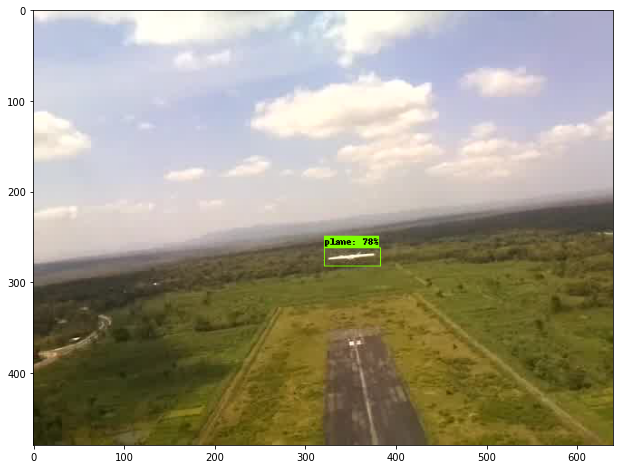

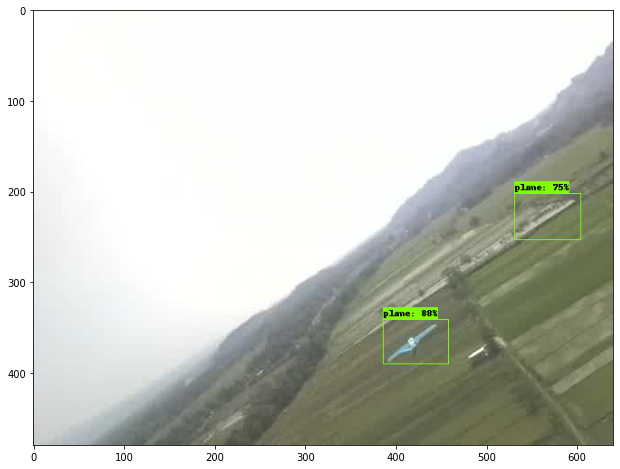

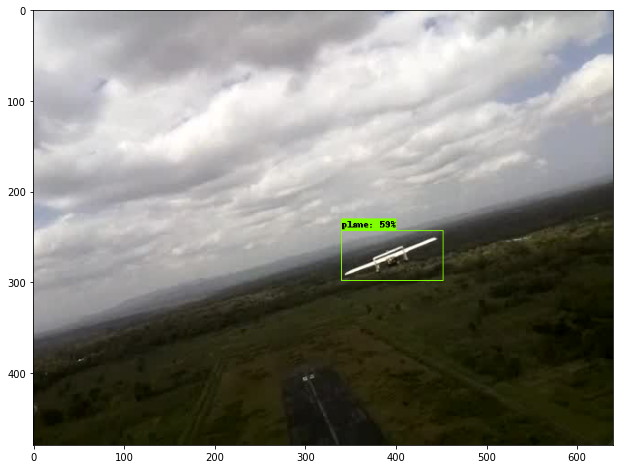

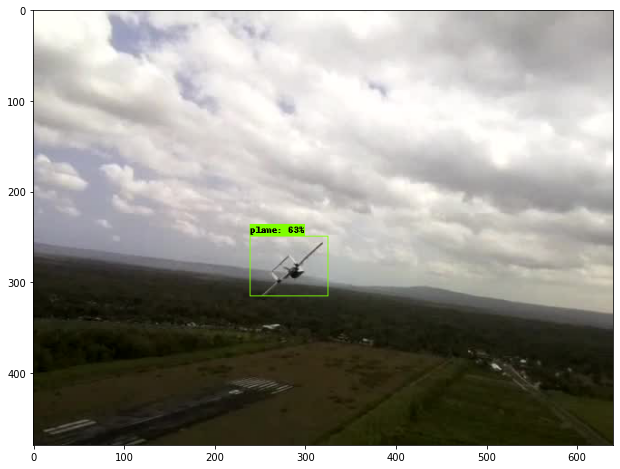

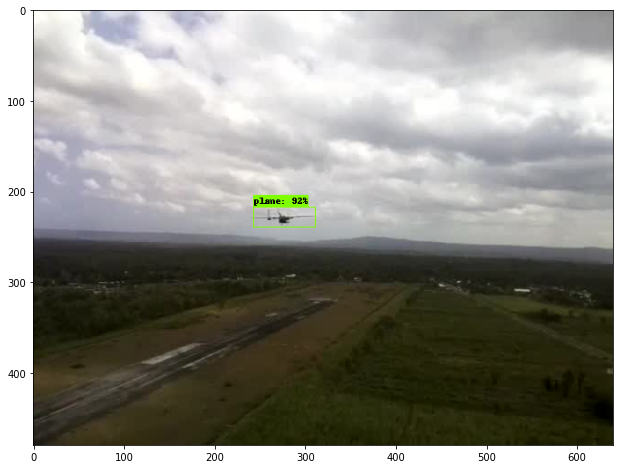

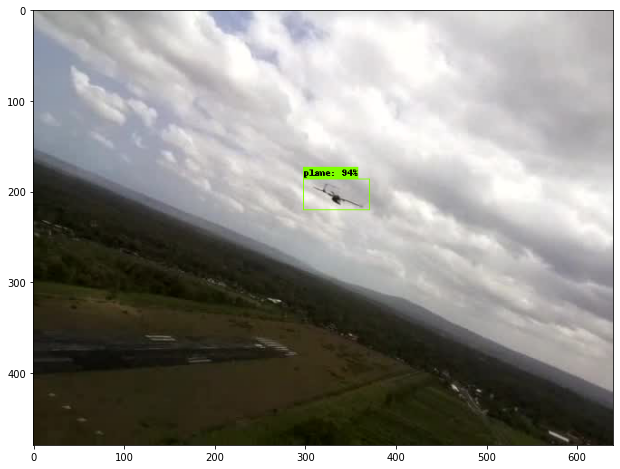

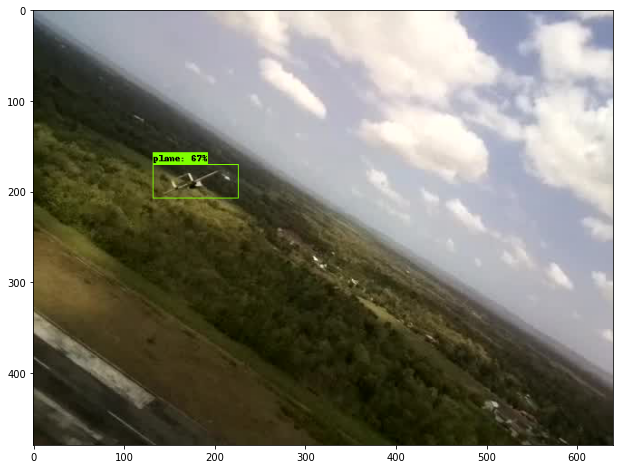

In [ ]:
# Make inference graph.
!python3 /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/content/models/research/object_detection/samples/configs/ssdlite_mobiledet_edgetpu_320x320_coco_sync_4x4.config \
    --output_directory=/content/inference_graph \
    --trained_checkpoint_prefix=/content/train/model.ckpt-10000

# Do a Quick Evaluation on the inference graph model.
import numpy as np
import os
import sys
import tensorflow as tf

from collections import defaultdict
from matplotlib import pyplot as plt
from PIL import Image

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
%matplotlib inline

# Initialize tf.Graph()
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile('/content/inference_graph/frozen_inference_graph.pb', 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

# Loads labels
label_map = label_map_util.load_labelmap('/content/drive/MyDrive/Deep Learning/mobiledet-22/annotations/label_map.pbtxt')
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=1, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Run Inference and populates results in a dict.
def run_inference(graph, image):
  with graph.as_default():
    with tf.Session() as sess:
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = [output.name for op in ops for output in op.outputs]
      tensor_dict = {}
      tensor_keys = ['num_detections', 'detection_boxes', 'detection_scores', 'detection_classes']
      for key in tensor_keys:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(tensor_name)
      
      # Actual inference.
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')
      output_dict = sess.run(tensor_dict, feed_dict={image_tensor: np.expand_dims(image, 0)})

      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
  return output_dict

test_image_path = [os.path.join('/content/dataset/test', '{}.jpg'.format(i)) for i in ['test (64)', 'test (70)', 'test (80)', 'test (90)', 'test (100)', 'test (110)', 'test (120)']]
for image_path in test_image_path:
  print('Evaluating:', image_path)
  image = Image.open(image_path)
  img_width, img_height = image.size
  image_np = np.array(image.getdata()).reshape((img_height, img_width, 3)).astype(np.uint8)
  # Run inference.
  output_dict = run_inference(detection_graph, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      line_thickness=1)
  plt.figure(figsize=(12, 8))
  plt.imshow(image_np)

**10. GENERATE THE TFLITE FILE**

In [ ]:
# Now we export this model to tflite_graph format.
%cd /content/models/research
!mkdir /content/output_model
!python3 object_detection/export_tflite_ssd_graph.py \
  --pipeline_config_path=/content/models/research/object_detection/samples/configs/ssdlite_mobiledet_edgetpu_320x320_coco_sync_4x4.config \
  --trained_checkpoint_prefix=/content/train/model.ckpt-10000 \
  --output_directory=/content/output_model \
  --add_postprocessing_op=true

# Now we can convert this custom trained model to a CPU tflite model
!tflite_convert \
  --output_file="/content/output_model/ssdlite_mobiledet_ashwincarra.tflite" \
  --graph_def_file="/content/output_model/tflite_graph.pb" \
  --inference_type=QUANTIZED_UINT8 \
  --input_arrays="normalized_input_image_tensor" \
  --output_arrays="TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3" \
  --mean_values=128 \
  --std_dev_values=128 \
  --input_shapes=1,320,320,3 \
  --allow_custom_ops

/content/models/research
Using TensorFlow backend.
Instructions for updating:
Please use `layer.__call__` method instead.
W0523 18:52:00.323540 140066901063552 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0523 18:52:03.881742 140066901063552 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0523 18:52:04.001453 140066901063552 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0523 18:52:04.122233 140066901063552 convolutional_box_predictor.py:155] depth of additional conv before box predict

In [ ]:
# Install tflite_runtime package to evaluate the model.
!pip3 install https://github.com/google-coral/pycoral/releases/download/release-frogfish/tflite_runtime-2.5.0-cp37-cp37m-linux_x86_64.whl  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 7.9 MB/s 


Evaluating: /content/dataset/test/test (64).jpg


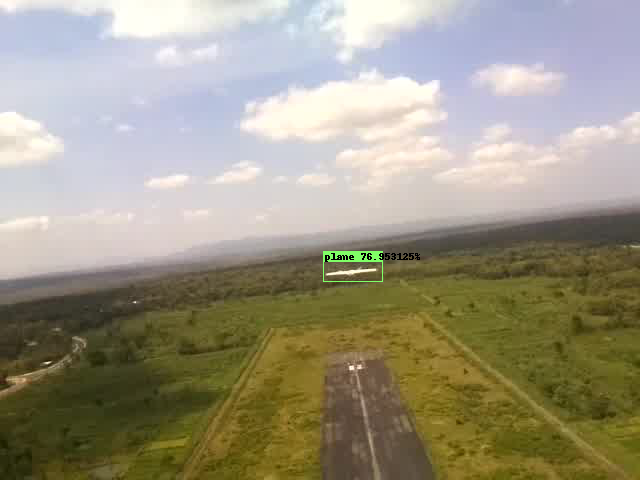

Evaluating: /content/dataset/test/test (70).jpg


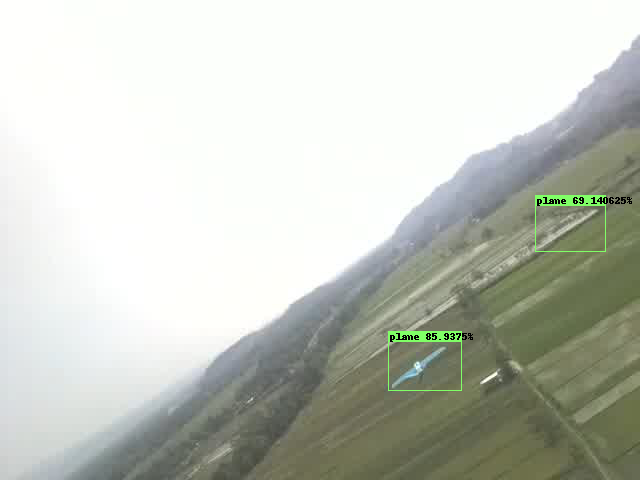

Evaluating: /content/dataset/test/test (80).jpg


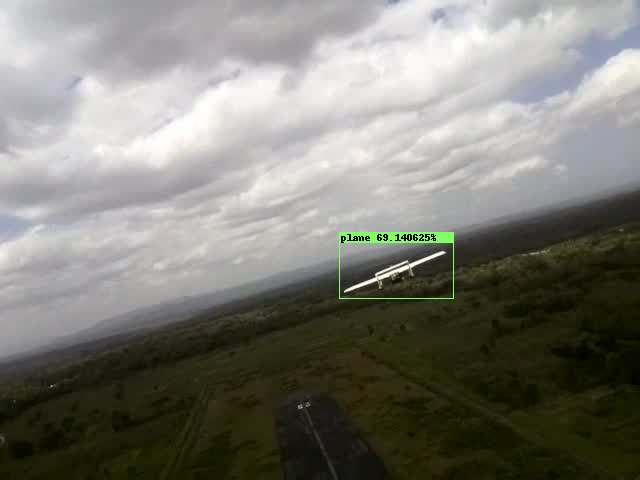

Evaluating: /content/dataset/test/test (90).jpg


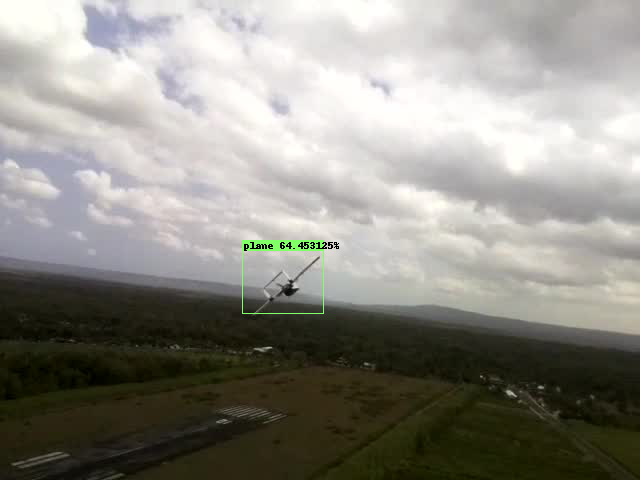

Evaluating: /content/dataset/test/test (100).jpg


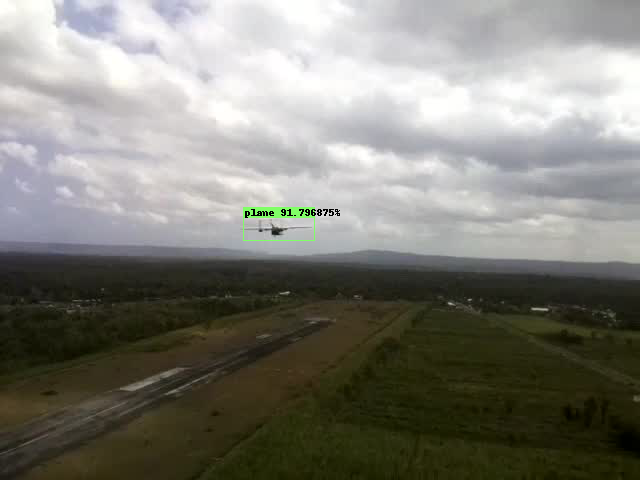

Evaluating: /content/dataset/test/test (110).jpg


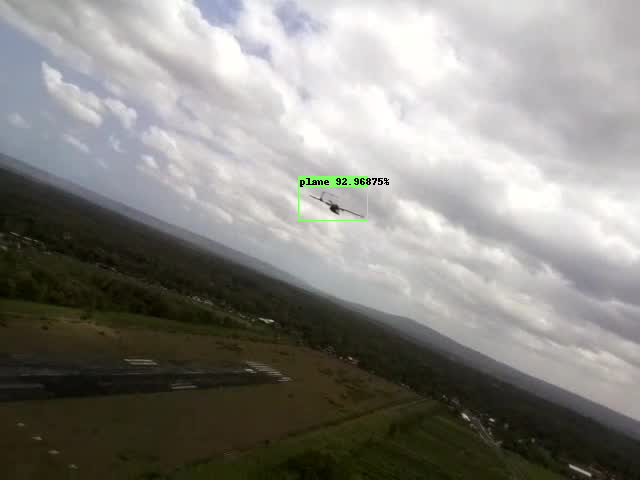

Evaluating: /content/dataset/test/test (120).jpg


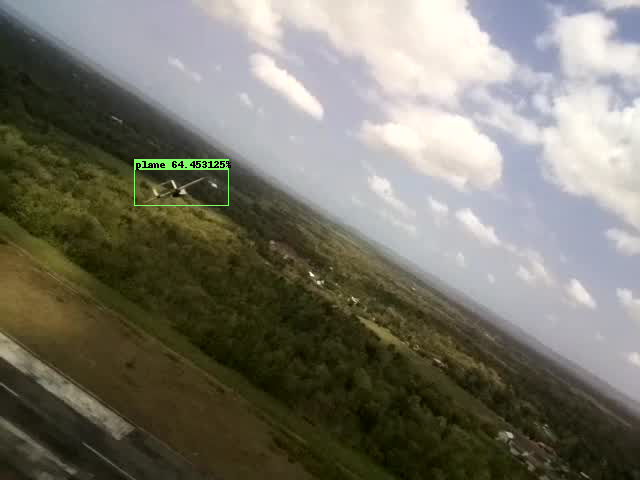

In [ ]:
# Now we do evaluation on the tflite model.
import os
import numpy as np
from tflite_runtime.interpreter import Interpreter
from tflite_runtime.interpreter import load_delegate
from PIL import Image
from PIL import ImageDraw
%matplotlib inline

# Creates tflite interpreter
interpreter = Interpreter('/content/output_model/ssdlite_mobiledet_ashwincarra.tflite')
# This exact code can be used to run inference on the edgetpu by simply creating 
# the instantialize the interpreter with libedgetpu delegates:
# interpreter = Interpreter(args.model, experimental_delegates=[load_delegate('libedgetpu.so.1.0')])
interpreter.allocate_tensors()
interpreter.invoke() # warmup
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
width = input_details[0]['shape'][2]
height = input_details[0]['shape'][1]

def run_inference(interpreter, image):
  interpreter.set_tensor(input_details[0]['index'], image)
  interpreter.invoke()
  boxes = interpreter.get_tensor(output_details[0]['index'])[0]
  classes = interpreter.get_tensor(output_details[1]['index'])[0]
  scores = interpreter.get_tensor(output_details[2]['index'])[0]
  # num_detections = interpreter.get_tensor(output_details[3]['index'])[0]
  return boxes, classes, scores

test_image_paths = [os.path.join('/content/dataset/test', '{}.jpg'.format(i)) for i in ['test (64)', 'test (70)', 'test (80)', 'test (90)', 'test (100)', 'test (110)', 'test (120)']]
for image_path in test_image_paths:
  print('Evaluating:', image_path)
  image = Image.open(image_path)
  image_width, image_height = image.size
  draw = ImageDraw.Draw(image)
  resized_image = image.resize((width, height))
  np_image = np.asarray(resized_image)
  input_tensor = np.expand_dims(np_image, axis=0)
  # Run inference
  boxes, classes, scores = run_inference(interpreter, input_tensor)
  # Draw results on image
  colors = {0:(128, 255, 102)}
  labels = {0:'plane'}
  for i in range(len(boxes)):
    if scores[i] > .5:
      ymin = int(max(1, (boxes[i][0] * image_height)))
      xmin = int(max(1, (boxes[i][1] * image_width)))
      ymax = int(min(image_height, (boxes[i][2] * image_height)))
      xmax = int(min(image_width, (boxes[i][3] * image_width)))
      draw.rectangle((xmin, ymin, xmax, ymax), width=1, outline=colors[int(classes[i])])
      draw.rectangle((xmin, ymin, xmax, ymin-10), fill=colors[int(classes[i])])
      text = labels[int(classes[i])] + ' ' + str(scores[i]*100) + '%'
      draw.text((xmin+2, ymin-10), text, fill=(0,0,0), width=2)
  display(image)

In [ ]:
# Install the edgetpu compiler.
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
!sudo apt-get update
!sudo apt-get install edgetpu-compiler

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   137k      0 --:--:-- --:--:-- --:--:--  137k
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://packages.cloud.google.com/apt coral-edgetpu-stable InRelease [6,722 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:8 https://packages.cloud.google.com/apt coral-edgetpu-stable/main amd64 Packages
Get:9 ht

In [ ]:
# Compile our model and make a tarball of the finished trained model.
%cd /content/output_model
!edgetpu_compiler --min_runtime_version 12 /content/output_model/ssdlite_mobiledet_ashwincarra.tflite
%cd /content/
# Copy the checkpoints, inference graph, pipeline config, and the tflite models.
#!cp -r /content/train /content/output_model
!cp -r /content/inference_graph/* /content/output_model
!tar cvf ssdlite_mobiledet_ashwincarra_0524.tar.gz output_model

/content/output_model
Edge TPU Compiler version 16.0.384591198
Started a compilation timeout timer of 180 seconds.

Model compiled successfully in 1014 ms.

Input model: /content/output_model/ssdlite_mobiledet_ashwincarra.tflite
Input size: 3.27MiB
Output model: ssdlite_mobiledet_ashwincarra_edgetpu.tflite
Output size: 4.27MiB
On-chip memory used for caching model parameters: 4.11MiB
On-chip memory remaining for caching model parameters: 3.40MiB
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 125
Operation log: ssdlite_mobiledet_ashwincarra_edgetpu.log

Model successfully compiled but not all operations are supported by the Edge TPU. A percentage of the model will instead run on the CPU, which is slower. If possible, consider updating your model to use only operations supported by the Edge TPU. For details, visit g.co/coral/model-reqs.
Number of operations that will run on Edge TPU: 124
Number of operations

In [ ]:
# copy model to drive
from google.colab import files
!cp ssdlite_mobiledet_ashwincarra_0524.tar.gz "/content/drive/MyDrive/Deep Learning/mobiledet-22/model"
#files.download('/content/ssdlite_mobiledet_ashwincarra_1404.tar.gz')